Dylan Donahue
Problem Set 1

Problem 1.1

<pre>
- this is a two category classification
- To find a numeric threshold, need to choose a loss function
    - Assume 0-1 Loss

α(x̄) = argmin(L(a,0) * py/x̄(0/x̄) + L(a,1) * py/x̄(1/x̄))


                          α(x̄) = 1
py/x̄(1/x̄) / py/x̄(0/x̄)       >=<       ( L(1,0) - L(0,0) ) / ( L(0,1) - L(1,1) )  
                          α(x̄) = 0

                
Apply Bayes:


                          α(x̄) = 1
fx̄/y(x̄/1) / fx̄/y(x̄/0)       >=<       ( Py(0) / Py(1) ) * ( L(1,0) - L(0,0) ) / ( L(0,1) - L(1,1) )
                          α(x̄) = 0

With 0-1 Loss: 


                          α(x̄) = 1
fx̄/y(x̄/1) / fx̄/y(x̄/0)       >=<       Py(0) / Py(1) 
                          α(x̄) = 0


                           α(x̄) = 1
fx̄/y(x̄/1) / fx̄/y(x̄/0)       >=<       2.33 
                          α(x̄) = 0     


γ = 2.33    

</pre>

PART A
Optimal threshold: 2.284569138276553
Optimal FPR: 0.05928571428571429
Optimal TPR: 0.8643333333333333
Optimal Perror: 0.0822


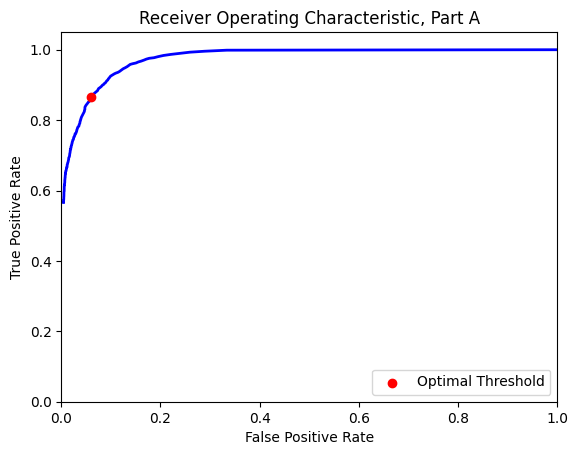

PART B
Optimal threshold: 2.164328657314629
Optimal FPR: 0.07971428571428571
Optimal TPR: 0.8806666666666667
Optimal Perror: 0.0916


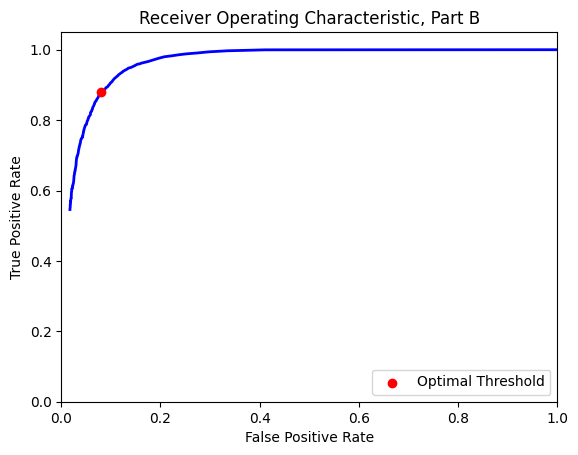

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed to ensure reproducibility
np.random.seed(343434)

################### PART A ###################

# Given parameters
mu0 = np.array([-1, 1, -1, 1])  
mu1 = np.array([1, 1, 1, 1]) 
sigma0 = np.array([[2, -.5, 0.3, 0], [-.5, 1, -.5, 0], [0.3, -.5, 1, 0], [0, 0, 0, 2]])       
sigma1 = np.array([[1, .3, -.2, 0], [.3, 2, .3, 0], [-.2, .3, 1, 0], [0, 0, 0, 3]])    

py0 = 0.7
py1 = 0.3
num_samples = 10000

# Generate samples
num_samples_y0 = int(num_samples * py0)
num_samples_y1 = int(num_samples * py1)

samples_y0 = np.random.multivariate_normal(mu0, sigma0, num_samples_y0)
samples_y1 = np.random.multivariate_normal(mu1, sigma1, num_samples_y1)

# True labels
y_true = np.array([0] * num_samples_y0 + [1] * num_samples_y1)

# Combine samples
samples = np.vstack((samples_y0, samples_y1))

# Calculate likelihoods
def multivariate_gaussian_pdf(x, mu, sigma):
    size = len(x)
    det = np.linalg.det(sigma)
    norm_const = 1.0 / (np.power((2 * np.pi), float(size) / 2) * np.power(det, 1.0 / 2))
    x_mu = x - mu
    inv = np.linalg.inv(sigma)
    result = np.exp(-0.5 * (np.dot(np.dot(x_mu, inv), x_mu.T)))
    return norm_const * result

likelihood_ratio = np.array([
    multivariate_gaussian_pdf(sample, mu1, sigma1) / multivariate_gaussian_pdf(sample, mu0, sigma0)
    for sample in samples
])

# iterate through gamma values
gammas = np.linspace(0, 20, 500)

decisions = np.array([likelihood_ratio > gamma for gamma in gammas])
fp = np.array([np.sum((decision == 1) & (y_true == 0)) for decision in decisions])
fpr = fp / num_samples_y0
tp = np.array([np.sum((decision == 1) & (y_true == 1)) for decision in decisions])
tpr = tp / num_samples_y1
errors = np.array([np.sum(decision != y_true) for decision in decisions])

optimal_idx = np.argmin(errors)
optimal_gamma = gammas[optimal_idx]
optimal_fpr = fpr[optimal_idx]
optimal_tpr = tpr[optimal_idx]

print("PART A")
print(f'Optimal threshold: {optimal_gamma}')
print(f'Optimal FPR: {optimal_fpr}')
print(f'Optimal TPR: {optimal_tpr}')
print(f'Optimal Perror: {errors[optimal_idx] / num_samples}')

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2)
plt.scatter([optimal_fpr], [optimal_tpr], color='red', zorder=5, label='Optimal Threshold') # highlights optmial threshold
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic, Part A')
plt.legend(loc="lower right")
plt.show()

################### PART B ###################

# Given parameters
sigma0 = np.array([[2, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 2]])       
sigma1 = np.array([[1, 0, 0, 0], [0, 2, 0, 0], [0, 0, 1, 0], [0, 0, 0, 3]])  

likelihood_ratio = np.array([
    multivariate_gaussian_pdf(sample, mu1, sigma1) / multivariate_gaussian_pdf(sample, mu0, sigma0)
    for sample in samples
])

decisions = np.array([likelihood_ratio > gamma for gamma in gammas])
fp = np.array([np.sum((decision == 1) & (y_true == 0)) for decision in decisions])
fpr = fp / num_samples_y0
tp = np.array([np.sum((decision == 1) & (y_true == 1)) for decision in decisions])
tpr = tp / num_samples_y1
errors = np.array([np.sum(decision != y_true) for decision in decisions])

optimal_idx = np.argmin(errors)
optimal_gamma = gammas[optimal_idx]
optimal_fpr = fpr[optimal_idx]
optimal_tpr = tpr[optimal_idx]

print("PART B")
print(f'Optimal threshold: {optimal_gamma}')
print(f'Optimal FPR: {optimal_fpr}')
print(f'Optimal TPR: {optimal_tpr}')
print(f'Optimal Perror: {errors[optimal_idx] / num_samples}')

# plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2)
plt.scatter([optimal_fpr], [optimal_tpr], color='red', zorder=5, label='Optimal Threshold') # highlights optmial threshold
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic, Part B')
plt.legend(loc="lower right")
plt.show()





P(error) = ( P(D=1/y=0) * Py(0) ) + ( P(D=0/y=1) * Py(1) )

(from script FPR and FNR)  = 0.0822


The empircal value of γ varied greatly with differnt seeds, ranging from 1.9-2.7 with a few manual tested seeds, but the seeds that produced the lowest p(error) were near 2.3
The value of γ for the current seed above is 2.285



For part B:

P(error) = 0.0916 --> slight increase from part A
empirical γ = 2.164

True positive rate increased, but so did false positive rate

Problem 1.2

Confusion Matrix: 
[[2866  466]
 [ 134 6534]]


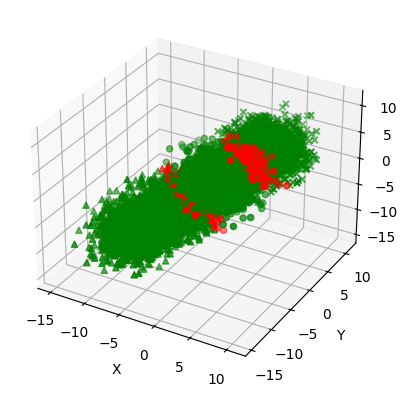

Error with lambda = 10:  0.086
Error with lambda = 100:  0.1188


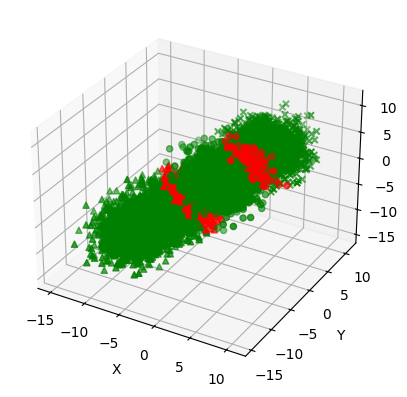

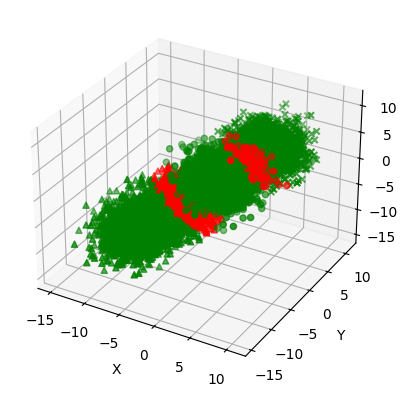

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed to ensure reproducibility
np.random.seed(343434)
n = 10000

################### PART A ###################

# Given parameters

p1 = 0.3
p2 = 0.3
p3 = 0.4

# Chosen paramaters - difference in mean = 2 * std_dev

mu1 = np.array([0, 0, 0])
mu2 = np.array([4, 4, 4])
mu3 = np.array([-4, -4, -4]) 
mu4 = np.array([-8, -8, -8])

# used for finding pdf of class 3
mu5 = np.mean([mu3, mu4], axis=0)



# keep it simple with diagonal covariance matrices, and equal variances

std_dev = 2
var = 4
sigma = np.eye(3) * var

# Generate samples

num_samples_y1 = int(n * p1)
num_samples_y2 = int(n * p2)
num_samples_y3 = int(n * p3)


samples_y1 = np.random.multivariate_normal(mu1, sigma, num_samples_y1)
samples_y2 = np.random.multivariate_normal(mu2, sigma, num_samples_y2)
samples_y3_p1 = np.random.multivariate_normal(mu3, sigma, int(num_samples_y3 * 0.5))
samples_y3_p2 = np.random.multivariate_normal(mu4, sigma, int(num_samples_y3 * 0.5))
samples_y3 = np.vstack((samples_y3_p1, samples_y3_p2))



# True labels
y_true = np.array([0] * num_samples_y1 + [1] * num_samples_y2 + [2] * (num_samples_y3))

# Combine samples
samples = np.vstack((samples_y1, samples_y2, samples_y3))

# MAP decision rule
def multivariate_gaussian_pdf(x, mu, sigma):
    size = len(x)
    det = np.linalg.det(sigma)
    norm_const = 1.0 / (np.power((2 * np.pi), float(size) / 2) * np.power(det, 1.0 / 2))
    x_mu = x - mu
    inv = np.linalg.inv(sigma)
    result = np.exp(-0.5 * (np.dot(np.dot(x_mu, inv), x_mu.T)))
    return norm_const * result

likelihoods = np.array([
    [multivariate_gaussian_pdf(sample, mu1, sigma), multivariate_gaussian_pdf(sample, mu2, sigma), multivariate_gaussian_pdf(sample, mu5, sigma)]
    for sample in samples
])

posteriors = likelihoods * np.array([p1, p2, p3])
y_pred = np.argmax(posteriors, axis=1)

tp = np.sum((y_pred == 0) & (y_true == 0))
fp = np.sum((y_pred == 0) & (y_true != 0))
tn = np.sum((y_pred != 0) & (y_true != 0))
fn = np.sum((y_pred != 0) & (y_true == 0))

confusion_matrix = np.array([[tp, fp], [fn, tn]])
print("Confusion Matrix: ")
print(confusion_matrix)

# Scatter plot

colors_y1 = ['g' if pred == 0 else 'r' for pred in y_pred[y_true == 0]]
colors_y2 = ['g' if pred == 1 else 'r' for pred in y_pred[y_true == 1]]
colors_y3 = ['g' if pred == 2 else 'r' for pred in y_pred[y_true == 2]]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(samples_y1[:, 0], samples_y1[:, 1], samples_y1[:, 2], c= colors_y1, marker='o')
ax.scatter(samples_y2[:, 0], samples_y2[:, 1], samples_y2[:, 2], c= colors_y2, marker='x')
ax.scatter(samples_y3[:, 0], samples_y3[:, 1], samples_y3[:, 2], c= colors_y3, marker='^')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

################### PART B ###################

# introduce loss matrices

lambda10 = np.array([[0, 1, 10], [1, 0, 10], [1, 1, 0]])
lambda100 = np.array([[0, 1, 100], [1, 0, 100], [1, 1, 0]])

# decision rule with loss

def loss_decision_rule(likelihoods, lambda_matrix):

    # prob * loss for each class to get risk
    losses = likelihoods @ lambda_matrix
    return np.argmin(losses, axis=1)

y_pred_10 = loss_decision_rule(posteriors, lambda10)
y_pred_100 = loss_decision_rule(posteriors, lambda100)

# Determine error

error_10 = np.sum(y_pred_10 != y_true) / n
error_100 = np.sum(y_pred_100 != y_true) / n

print("Error with lambda = 10: ", error_10)
print("Error with lambda = 100: ", error_100)

# Scatter plot

colors_y1 = ['g' if pred == 0 else 'r' for pred in y_pred_10[y_true == 0]]
colors_y2 = ['g' if pred == 1 else 'r' for pred in y_pred_10[y_true == 1]]
colors_y3 = ['g' if pred == 2 else 'r' for pred in y_pred_10[y_true == 2]]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(samples_y1[:, 0], samples_y1[:, 1], samples_y1[:, 2], c= colors_y1, marker='o')
ax.scatter(samples_y2[:, 0], samples_y2[:, 1], samples_y2[:, 2], c= colors_y2, marker='x')
ax.scatter(samples_y3[:, 0], samples_y3[:, 1], samples_y3[:, 2], c= colors_y3, marker='^')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

colors_y1 = ['g' if pred == 0 else 'r' for pred in y_pred_100[y_true == 0]]
colors_y2 = ['g' if pred == 1 else 'r' for pred in y_pred_100[y_true == 1]]
colors_y3 = ['g' if pred == 2 else 'r' for pred in y_pred_100[y_true == 2]]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(samples_y1[:, 0], samples_y1[:, 1], samples_y1[:, 2], c= colors_y1, marker='o')
ax.scatter(samples_y2[:, 0], samples_y2[:, 1], samples_y2[:, 2], c= colors_y2, marker='x')
ax.scatter(samples_y3[:, 0], samples_y3[:, 1], samples_y3[:, 2], c= colors_y3, marker='^')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()






It is worth noting that high accuracy, as seen with these, depends on the two gaussians making up class 3 having a mean that does not overlap signifcantly with the means of the first two gaussians. If this were not the case, there would be a much larger error due to class 3 existing right in the middle of classes 1 and 2

Interesting observation: with the 100x loss, the p(error) increases, likely due to overcompensating in choosing class 3 in an effort to avoid the 100x loss

Problem 1.3

-----------------------WINE QUALITY DATASET--------------------------
Number of errors: 2390
Probability of error: 0.4879542670477746
Confusion Matrix:
[[   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    7    1    4    8    0    0    0    0]
 [   0    0    0    8    6   84   65    0    0    0    0]
 [   0    0    0   24   13  761  656    2    1    0    0]
 [   0    0    0   32    4  475 1626   61    0    0    0]
 [   0    0    0    5    0   86  679  108    2    0    0]
 [   0    0    0    5    0    8  127   35    0    0    0]
 [   0    0    0    0    0    0    3    2    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]]

--------------------------------------------------------------------


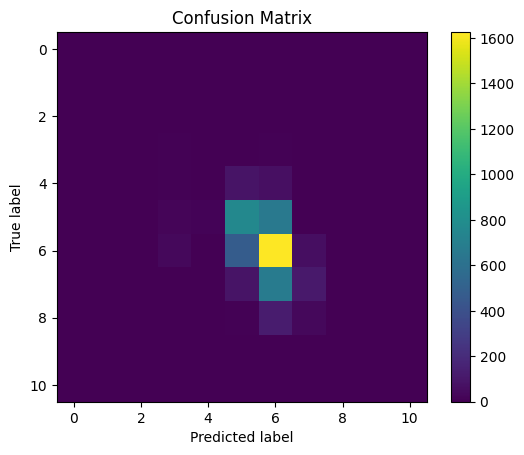

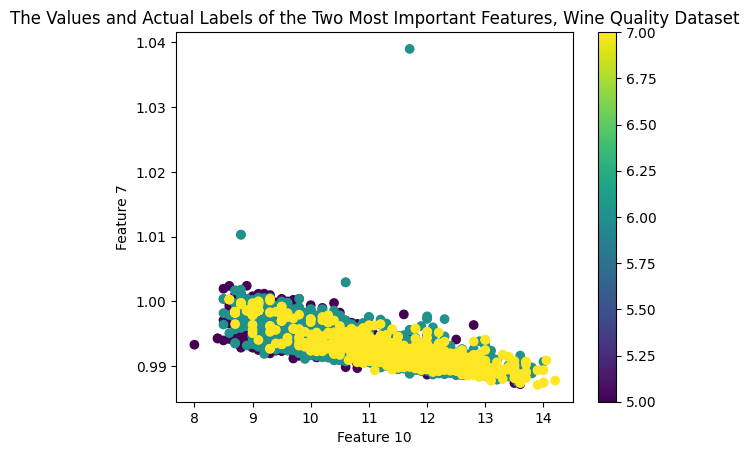

FileNotFoundError: [Errno 2] No such file or directory: 'human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier


# Set seed to ensure reproducibility
np.random.seed(343434)


####################### WINE QUALITY DATASET #######################


wine_data = pd.read_csv('wine+quality/winequality-white.csv', delimiter=';')

# Handle potential NaN values
wine_data.dropna(inplace=True)

# Format data

samples = wine_data.iloc[:, :-1].values  # Features
labels = wine_data['quality'].values.astype(int)  # Labels as integers
num_samples, num_features = samples.shape
num_classes = 11

class_counts = np.bincount(labels, minlength=num_classes)

# Estimate parameters

mu = np.zeros((num_features, num_classes))
sigma = np.zeros((num_features, num_features, num_classes))

# 0.1 is arbitrary regularization term
regularization_term = 0.1 * np.eye(num_features)


for i in range(num_classes):
    if class_counts[i] > 0:  # Only calculate if there are samples for this class
        class_samples = samples[labels == i]
        mu[:, i] = np.mean(class_samples, axis=0)
        if class_samples.shape[0] > 1:  # More than one sample required to calculate covariance
            sigma[:, :, i] = np.cov(class_samples.T) + regularization_term
        else:
            sigma[:, :, i] = regularization_term 
    else:
            sigma[:, :, i] = regularization_term 


priors = np.array([np.sum(labels == i) / num_samples for i in range(num_classes)])

# Calculate likelihoods - dataset is large, so we will optimize with vectorization

likelihoods = np.zeros((num_samples, num_classes))
for i in range(num_classes):
    likelihoods[:, i] = np.exp(-0.5 * np.sum((samples - mu[:, i]) @ np.linalg.inv(sigma[:, :, i]) * (samples - mu[:, i]), axis=1))


# MAP decision rule

posteriors = likelihoods * priors
y_pred = np.argmax(posteriors, axis=1)

# evaluate performance
num_errors = np.sum(y_pred != labels)
p_error = num_errors / num_samples

confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)
for true_label, pred_label in zip(labels, y_pred):
    confusion_matrix[true_label, pred_label] += 1

print("-----------------------WINE QUALITY DATASET--------------------------")
print('Number of errors:', num_errors)
print('Probability of error:', p_error)
print('Confusion Matrix:')
print(confusion_matrix)
print("\n--------------------------------------------------------------------")

# Visualize results

# heat map of confusion matrix
plt.figure()
plt.imshow(confusion_matrix, interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# pull important features for the high error classes, show overlap
relevant_classes = [5, 6, 7]
relevant_samples = np.vstack([samples[labels == i] for i in relevant_classes])
relevant_labels = np.hstack([labels[labels == i] for i in relevant_classes])

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(relevant_samples, relevant_labels)

# Get feature importances
feature_importances = rf.feature_importances_

# Sort features by importance
sorted_indices = np.argsort(feature_importances)[::-1]

# Scatter plot of the two most important features
plt.figure()
plt.scatter(relevant_samples[:, sorted_indices[0]], relevant_samples[:, sorted_indices[1]], c=relevant_labels, cmap='viridis')
plt.xlabel(f'Feature {sorted_indices[0]}')
plt.ylabel(f'Feature {sorted_indices[1]}')
plt.title('The Values and Actual Labels of the Two Most Important Features, Wine Quality Dataset')
plt.colorbar()
plt.show()


####################### HUMAN ACTIVITY DATASET #######################

# Load data

samples = []
labels = []

# NOTE: This dataset is too large to commit to GitHub, so it must be downloaded locally and in this directory
with open ('human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt') as file:
    for line in file:
        # Strip whitespace characters and split by space
        line = line.strip()
        if line:  # Check if line is not empty
            features = line.split()
            # Convert features to float and append to samples
            samples.extend([float(feature) for feature in features])

with open('human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt') as file:
    labels = np.array([int(line.strip()) for line in file])

labels -= 1  # Convert to 0-indexed
samples = np.array(samples)
samples = samples.reshape(-1, 561)  # 561 features per sample

num_samples, num_features = samples.shape
num_classes = 6
class_counts = np.bincount(labels, minlength=num_classes)

# Estimate parameters

mu = np.zeros((num_features, num_classes))

sigma = np.zeros((num_features, num_features, num_classes))

# 0.01 is arbitrary regularization term
regularization_term = .1 * np.eye(num_features)

for i in range(num_classes):
    if class_counts[i] > 0:  # Only calculate if there are samples for this class
        
        class_samples = samples[labels == i]
        mu[:, i] = np.mean(class_samples, axis=0)
        if class_samples.shape[0] > 1:  # More than one sample required to calculate covariance
            sigma[:, :, i] = np.cov(class_samples.T) + regularization_term
        else:
            sigma[:, :, i] = regularization_term
    else:
        sigma[:, :, i] = regularization_term

priors = np.array([np.sum(labels == i) / num_samples for i in range(num_classes)])

# Calculate likelihoods for all classes

likelihoods = np.zeros((num_samples, num_classes))
for i in range(num_classes):
    likelihoods[:, i] = np.exp(-0.5 * np.sum((samples - mu[:, i]) @ np.linalg.inv(sigma[:, :, i]) * (samples - mu[:, i]), axis=1))




# MAP decision rule

posteriors = likelihoods * priors
y_pred = np.argmax(posteriors, axis=1)

# evaluate performance

num_errors = np.sum(y_pred != labels)
p_error = num_errors / num_samples

confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)
for true_label, pred_label in zip(labels, y_pred):
    confusion_matrix[true_label, pred_label] += 1

print("-----------------------HUMAN ACTIVITY DATASET--------------------------")
print('Number of errors:', num_errors)
print('Probability of error:', p_error)
print('Confusion Matrix:')
print(confusion_matrix)
print("\n--------------------------------------------------------------------")

# Visualize results

# heat map of confusion matrix

plt.figure()
plt.imshow(confusion_matrix, interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# pull important features for the high error classes, show overlap
relevant_classes = [0, 1, 2, 3, 4, 5]
relevant_samples = np.vstack([samples[labels == i] for i in relevant_classes])
relevant_labels = np.hstack([labels[labels == i] for i in relevant_classes])

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(relevant_samples, relevant_labels)

# Get feature importances
feature_importances = rf.feature_importances_

# Sort features by importance
sorted_indices = np.argsort(feature_importances)[::-1]

# Scatter plot of the two most important features
plt.figure()
plt.scatter(relevant_samples[:, sorted_indices[0]], relevant_samples[:, sorted_indices[1]], c=relevant_labels, cmap='viridis')
plt.xlabel(f'Feature {sorted_indices[0]}')
plt.ylabel(f'Feature {sorted_indices[1]}')
plt.title('The Values and Actual Labels of the Two Most Important Features, Human Activity Dataset')
plt.colorbar()
plt.show()

# plot the next two for classes that were clustered for te top two 

relevant_classes = [0, 1, 2, 3, 4]
relevant_samples = np.vstack([samples[labels == i] for i in relevant_classes])
relevant_labels = np.hstack([labels[labels == i] for i in relevant_classes])

plt.figure()
plt.scatter(relevant_samples[:, sorted_indices[2]], relevant_samples[:, sorted_indices[3]], c=relevant_labels, cmap='viridis')
plt.xlabel(f'Feature {sorted_indices[2]}')
plt.ylabel(f'Feature {sorted_indices[3]}')
plt.title('The Values and Actual Labels of the Next Two Most Important Features, Human Activity Dataset')
plt.colorbar()
plt.show()









For both datasets, I applied the MAP rule, and used empirical sample means, covariances and priors were pulled from the samples in order to make predictions. In order to avoid dertermenants equal to zero, which would lead to dividing by zero, a small regularization parameter was added to both. For the activity dataset, since the features were normalized between -1 and 1, I felt like 0.1 was a small but significant enough value, though it was admiittetly still somewhat arbitrarily picked. Because the wine dataset was seemingly not normalized, those decision was also made somewhat arbitrarily, though because the features were mostly within the scale of ones to hundreds, I assumed the 0.1 was also valid here. 

There was also no indication that losses should be weighted any differently than one another - thus, a simple 0,1 loss function made the most sense.

In the end, it seems clear that the wine dataset should not be represented by a gaussian. Above, The confusion matrix shows all of the data clustered to only a few classes in the middle, which is where a majority of the error came from. Also printed is cluster of the two most important features - as determined by the random forrest library. From that, it shows that the two most important features have almost identical distributions for the highest probability classes - making it challegning to decipher one class from another. 

Within the context of this problem, a driving factor in this is likely in two areas: unnormalized features and feature independence. Firstly, the features were not normalized at at all. Different features are expressed on different magnitudes. This simply means they will not follow a normal distribution. Likewise, the features that this wine was judged on likely have strong correlation - I imagine fixed acity, volatile acidty, and citric acid, for example, may have significant correlation. A gaussian model assumes independent features, which is problematic here.

The human activity dataset did perform well within the gaussian model. Here, both the distribution of the two most important features, and the next two most important is shown. From this, clear patterns of isolation can already be seen, depsite being only 4 of 500+ features. Class 5 already has a completely isolated pattern of the two most important features, and class 3 then seperates itself from the remaining ones in the next most important. 

Of course, these four features alone do not tell the entire story, but they depict the patterns that eventually make it easier to make accurate decisions. 

This data was normalized, which imediatly makes it better suited for the gaussian model.